In [2]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
from statistics import mean
from scipy.stats import norm
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='Group', ylabel='Scores'>

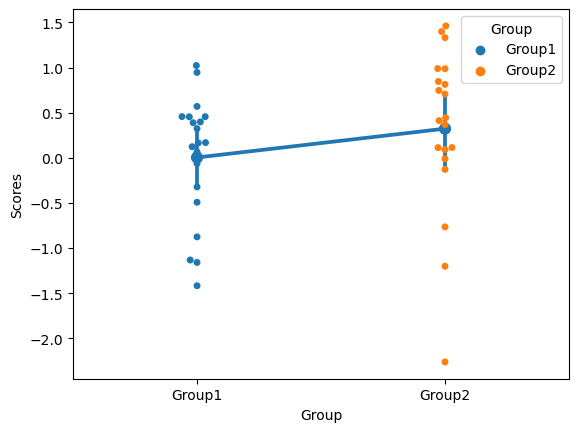

In [3]:
mean1 = 0
n = 20
effect_size = 0.3
sd = 1

n1 = 10000
n2 = 10000

group1 = np.random.normal(loc = mean1, scale = sd, size = n)
group2 = np.random.normal(loc = mean1 + effect_size, scale = sd, size = n)

df = pd.DataFrame({'Group1': group1, 'Group2': group2}).melt(var_name = 'Group', value_name = 'Scores')

sns.pointplot(data = df, x = 'Group', y = 'Scores')
sns.swarmplot(data = df, x = 'Group', y = 'Scores', hue = 'Group')


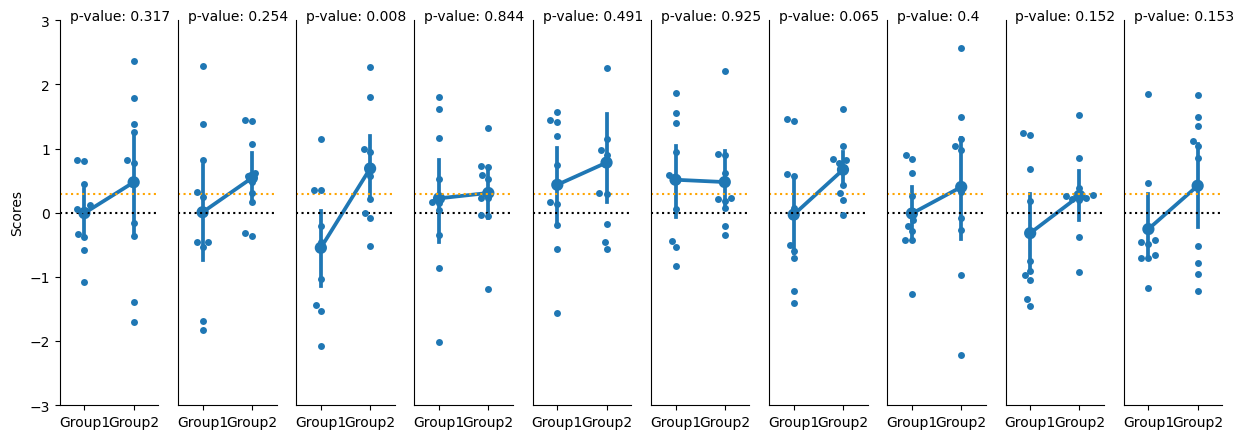

In [11]:
mean1 = 0
n = 10
effect_size = 0.3
sd = 1

n1 = 10000
n2 = 10000


experiments = 10

fig, axes = plt.subplots(1, experiments, figsize=(15, 5))





for i in range(experiments):
   group1 = np.random.normal(loc = mean1, scale = sd, size = n)
   group2 = np.random.normal(loc = mean1 + effect_size, scale = sd, size = n)
   df = pd.DataFrame({'Group1': group1, 'Group2': group2}).melt(var_name = 'Group', value_name = 'Scores')
   sns.pointplot(data = df, x = 'Group', y = 'Scores', ax = axes[i])
   sns.swarmplot(data = df, x = 'Group', y = 'Scores', ax = axes[i])
   axes[i].set(xlabel=None)
   axes[i].set_ylim(-3, 3)
   axes[i].axhline(y = mean1, color = 'black', linestyle = 'dotted')
   axes[i].axhline(y = effect_size, color = 'orange', linestyle = 'dotted')
   sns.despine()
   if i > 0:
    axes[i].get_yaxis().set_visible(False)
   res = pg.ttest(group1,group2)
   p = res['p-val'][0]
   axes[i].text(0.1, 1, 'p-value: ' + str(round(p,3)), transform=axes[i].transAxes)

   

Sex differences in personality: effect sizes around .2 to .3
Effects of educational interventions: effect sizes around .3 to .4
Sex differences in height: effect size around 1.7

(from Dorothy Bishop's [video on effect sizes](https://youtu.be/ovHzFVzJyQg?si=MY4-6MF6Ln2lxyNL&t=247))

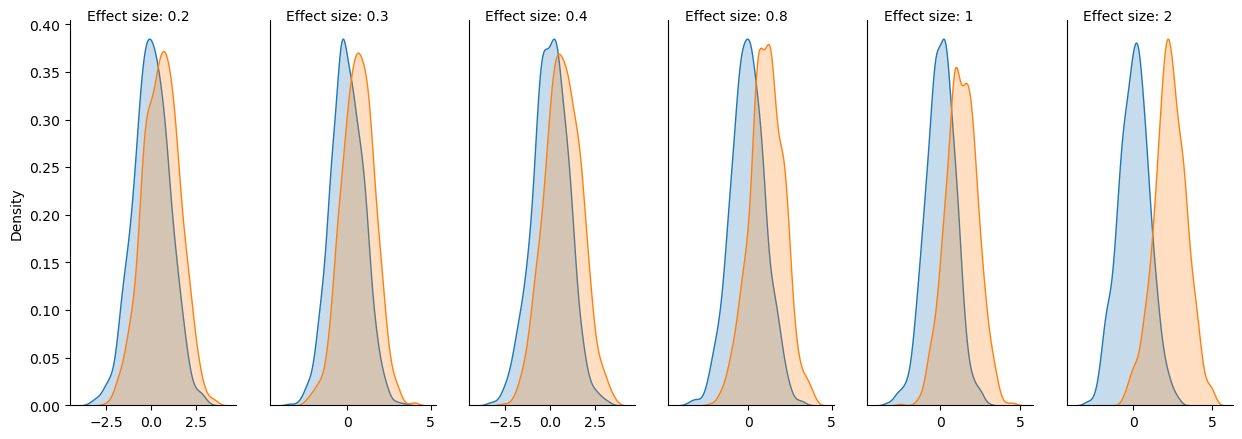

In [22]:
n = 1000
mean1 = 0
sd = 1

effect_sizes = [0.2, 0.3, 0.4, 0.8, 1, 2]

fig, axes = plt.subplots(1, len(effect_sizes), figsize=(15, 5))

for i in range(len(effect_sizes)):
   group1 = np.random.normal(loc = mean1, scale = sd, size = n)
   group2 = np.random.normal(loc = effect_sizes[i] + effect_size, scale = sd, size = n)
   #df = pd.DataFrame({'Group1': group1, 'Group2': group2}).melt(var_name = 'Group', value_name = 'Scores')
   sns.kdeplot(group1, ax = axes[i], fill = True)
   sns.kdeplot(group2, ax = axes[i], fill = True)
   sns.despine()
   axes[i].text(0.1, 1, 'Effect size: ' + str(effect_sizes[i]), transform=axes[i].transAxes)
   if i > 0:
      axes[i].get_yaxis().set_visible(False)
   
